### Importo librerias y el código comprimido del tratamiento de datos realizado previamente en "tratamiento_datos.ipynb"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("../data/datos_vibra_limpios.csv", sep = ";")
df

,Id,Especie,Nombre,Raza,Sexo,Edad,Diagnostico 1,Gasto_rehabilitacion,Gasto_tienda,Dieta,Tutor
0,1,Canina,Wateke,Mestizo,Macho,7,Acondicionamiento,0.00,0.0,0.0,Mujer
1,2,Canina,Cuco,Chihuahua,Macho,19,Artrosis,274.63,0.0,0.0,Mujer
2,3,Canina,Emma,Mestizo,Hembra,15,Artrosis,255.00,0.0,0.0,Mujer
3,4,Canina,Jalito,Yorkshire Terrier,Macho,12,Luxacion de Rotula,55.00,0.0,0.0,Mujer
4,5,Canina,Tote,Yorkshire Terrier,Macho,12,Artrosis,55.00,0.0,0.0,Mujer
...,...,...,...,...,...,...,...,...,...,...,...
413,416,Canina,Sally,Galgo,Hembra,1,Acondicionamiento,70.00,0.0,0.0,Mujer
414,417,Canina,Rufus,Golden Retriever,Macho,2,Displasia Cadera,70.00,0.0,0.0,Mujer
415,418,Canina,Golfo,Teckel,Macho,4,Acondicionamiento,70.00,0.0,0.0,Mujer
416,419,Canina,Nola,Pastor Alemán,Hembra,9,Displasia Cadera,70.00,2.0,0.0,Mujer


### Tratamiento Univariante de las columnas de interés
#### Empiezo con las numéricas

In [3]:
df[["Gasto_rehabilitacion", "Gasto_tienda"]].describe()

,Gasto_rehabilitacion,Gasto_tienda
count,418.000000,418.000000
mean,422.855598,14.648895
std,540.641847,121.782159
min,0.000000,0.000000
25%,70.000000,0.000000
50%,295.000000,0.000000
75%,520.000000,0.000000
max,4672.850000,2256.730000


In [ ]:
df_cv = df[["Gasto_rehabilitacion", "Gasto_tienda"]].describe().loc[["std", "mean"]].T
df_cv["Coeficiente_variabilidad"] = df_cv["std"] / df_cv["mean"]
df_cv

,std,mean,Coeficiente_variabilidad
Gasto_rehabilitacion,540.641847,422.855598,1.278550
Gasto_tienda,121.782159,14.648895,8.313403


- Columnas con una elevada variabilidad
- Veamos la distribucion de sus datos

c:\Users\Borja\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Borja\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


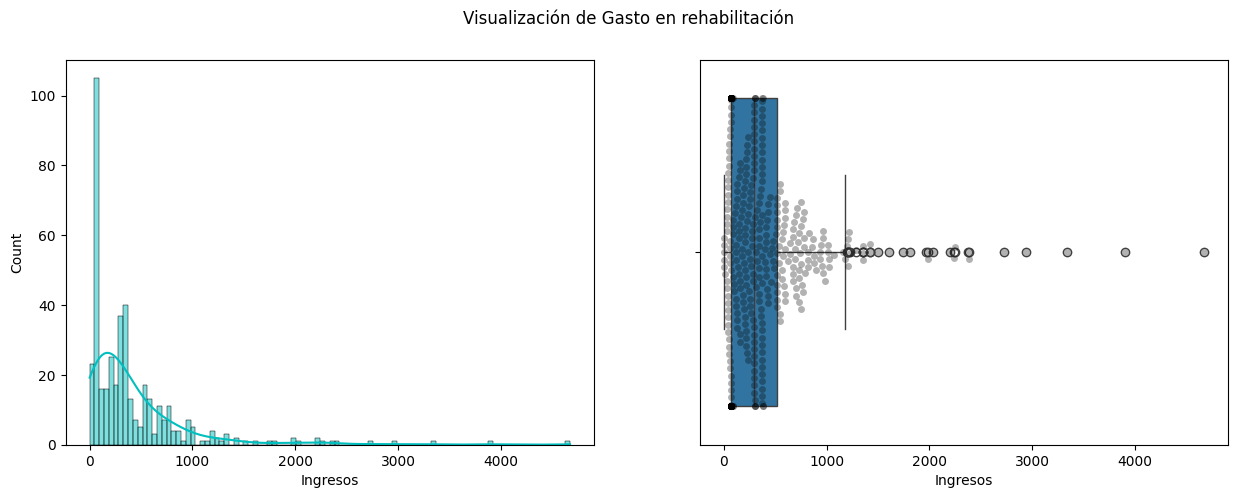

In [8]:
fig,axs = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("Visualización de Gasto en rehabilitación")
sns.histplot(df["Gasto_rehabilitacion"],kde=True, color='c',bins=100, ax = axs[0]) 
axs[0].set_xlabel("Ingresos");
sns.boxplot(x = "Gasto_rehabilitacion", data = df, ax = axs[1]);
sns.swarmplot(x = "Gasto_rehabilitacion", data=df, color="black", ax=axs[1], alpha=0.3);
axs[1].set_xlabel("Ingresos");

fig.savefig("../img/gasto_rehab.png")

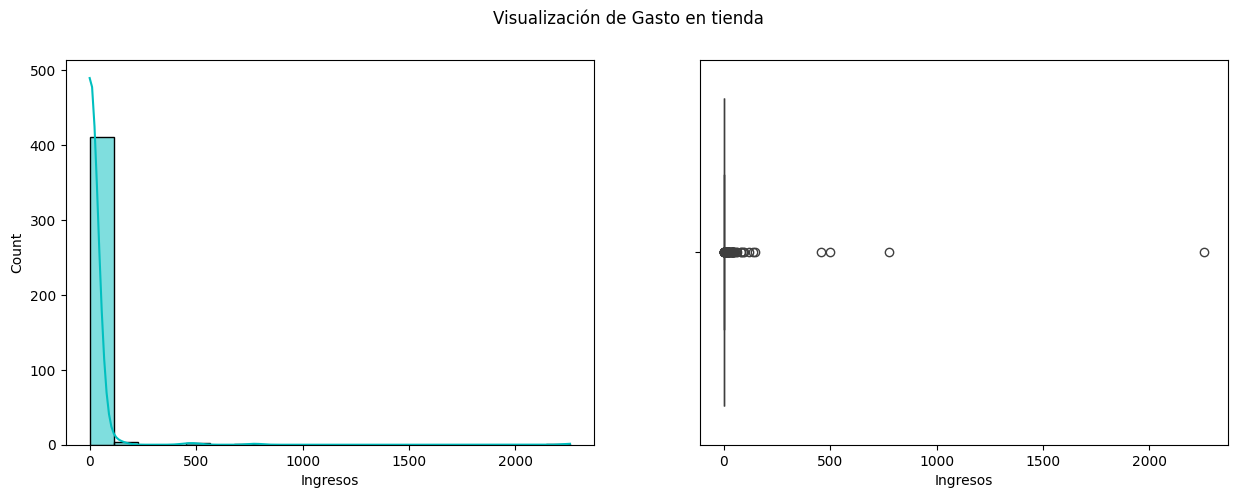

In [9]:
fig,axs = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("Visualización de Gasto en tienda")
sns.histplot(df["Gasto_tienda"],kde=True, color='c',bins=20, ax = axs[0]) 
axs[0].set_xlabel("Ingresos");
sns.boxplot(x = "Gasto_tienda", data = df, ax = axs[1]);
axs[1].set_xlabel("Ingresos");

In [19]:
df.Gasto_tienda.value_counts()
print((320/418)*100)

76.55502392344498


- El cliente apenas consume producto de la tienda. A tener en cuenta para que no suponga un excedente en el flujo de caja de la empresa. El 76,5% de la clientela no consume en la tienda
- La fuente de ingresos principal de la clínica debe está en la parte de rehabilitación
- Hay que potenciar y visualizar la tienda para incrementar la facturación

In [20]:
df.Edad.describe()

count    418.000000
mean       8.909091
std        4.376892
min        1.000000
25%        5.000000
50%        9.000000
75%       12.000000
max       20.000000
Name: Edad, dtype: float64

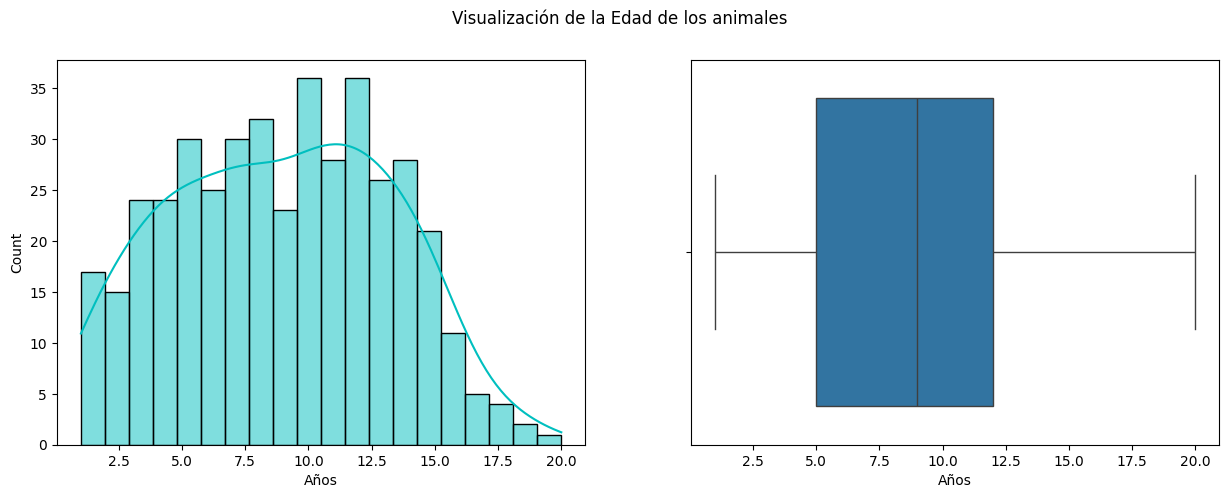

In [9]:
fig,axs = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("Visualización de la Edad de los animales")
sns.histplot(df["Edad"],kde=True, color='c',bins=20, ax = axs[0]) 
axs[0].set_xlabel("Años");
sns.boxplot(x = "Edad", data = df, ax = axs[1]);
axs[1].set_xlabel("Años");

fig.savefig("../img/edad.png")

- En el histograma se aprecia como es mayoritaria la presencia de animales con edades entre los 10 y 12 años
- Tanto la media como la mediana indican edades practicamente iguales
- Podriamos decir que siendo que el rango de edad considerado donde las mascotas empiezan a considerarse jeriatricas es a partir de los 8 años, la afluencia de clientes 

#### Pasemos a las variables categóricas. Vamos a considerar el diagnóstico como una de ellas por interés científico

In [ ]:
from bootcampviztools import pinta_distribucion_categoricas

##### Frecuencias relativas

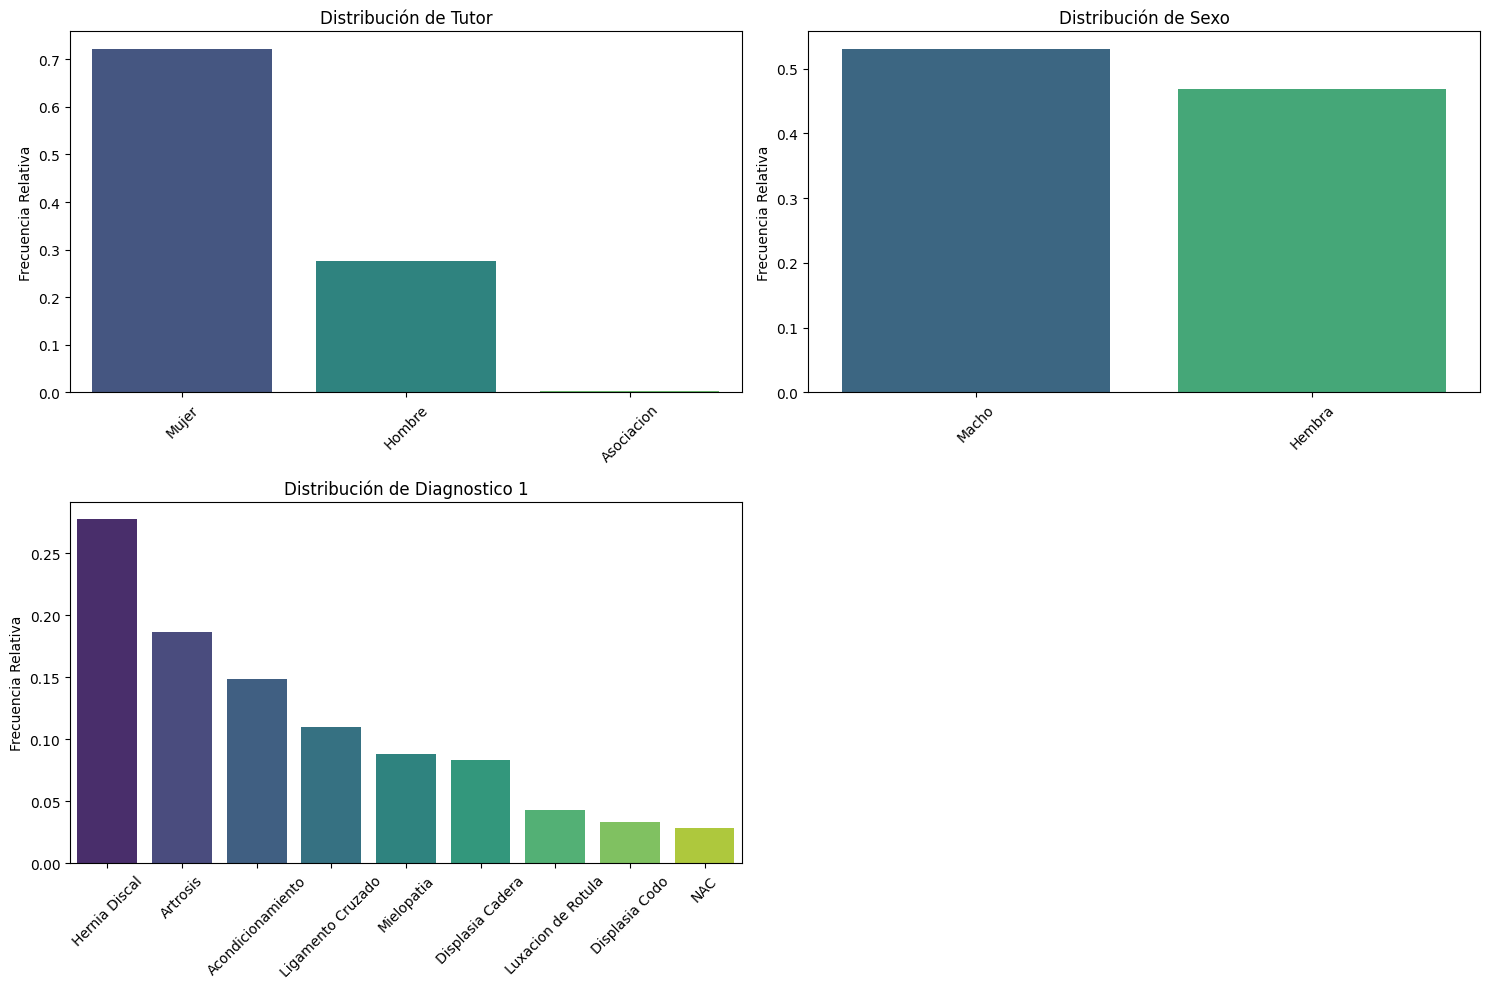

In [35]:
pinta_distribucion_categoricas(df, ["Tutor", "Sexo", "Diagnostico 1"], relativa=True)

C:\Users\Borja\AppData\Local\Temp\ipykernel_17076\3599346563.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(df["Diagnostico 1"].value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_17076\3599346563.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(df["Diagnostico 1"].value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")
C:\Users\Borja\AppData\Local\Temp\ipykernel_17076\3599346563.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alwa

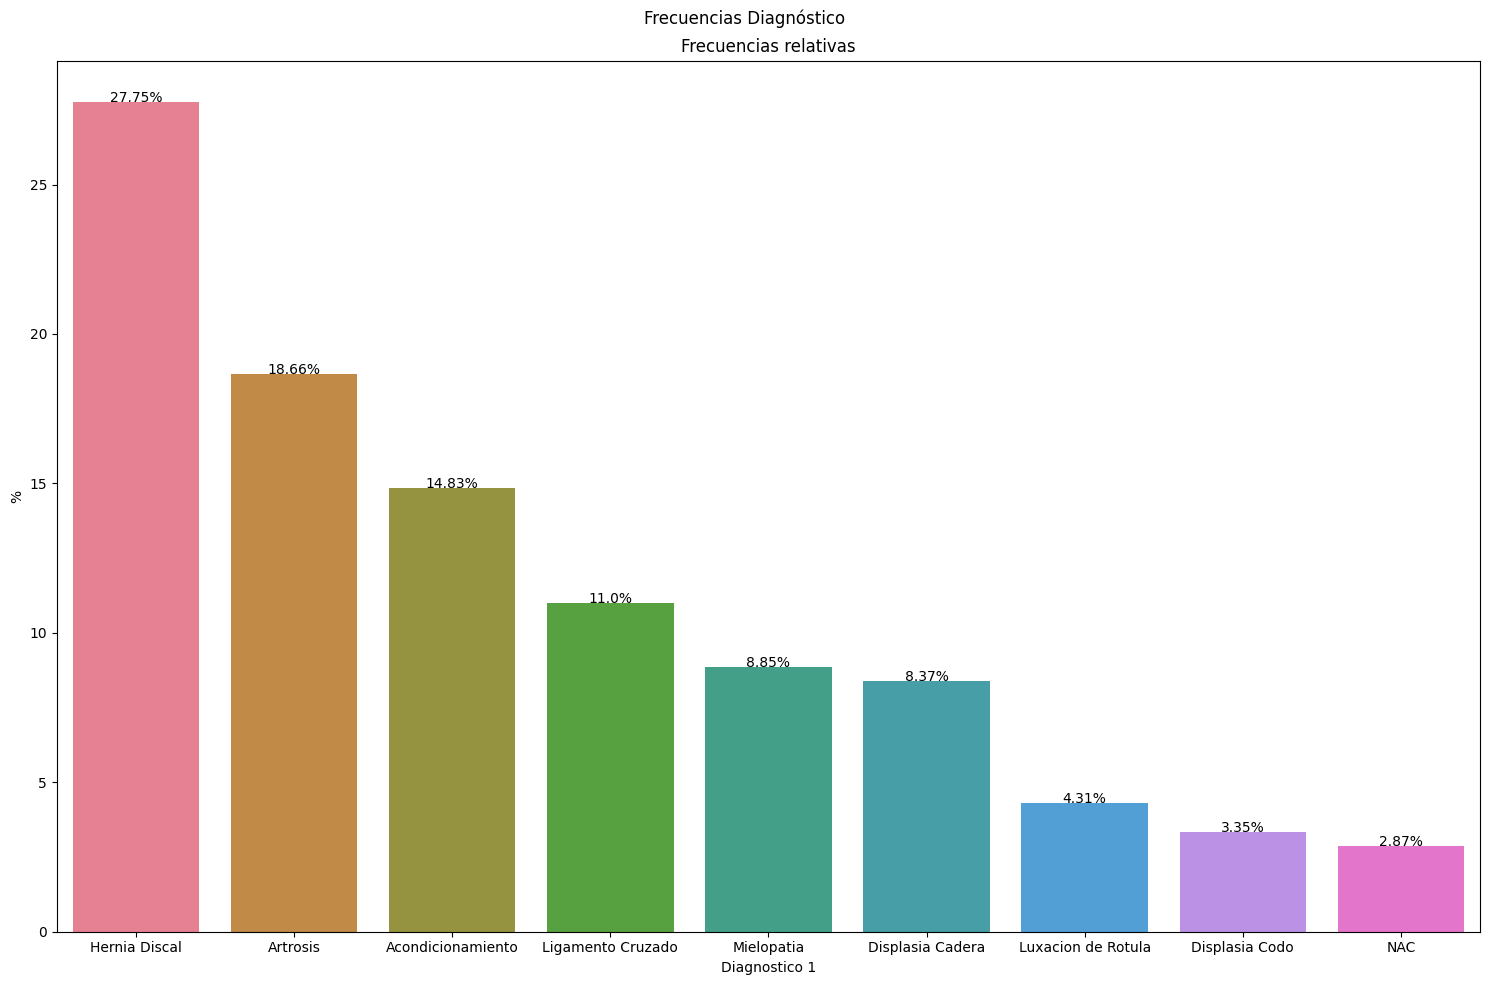

In [10]:
valores = df["Diagnostico 1"].value_counts(normalize = True) * 100
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
fig.suptitle("Frecuencias Diagnóstico")
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs, palette="husl")
axs.set_title("Frecuencias relativas")
axs.set_ylabel("%")
for i in range(len(valores)):
    axs.text(df["Diagnostico 1"].value_counts().index[i], valores[i], f"{valores[i].round(2)}%", ha="center")

plt.tight_layout();

fig.savefig("../img/frec_rel_lesiones.png")

- En torno al 70% de los dueños de las mascotas son mujeres
- La lesión que más se trata es la hernia discal con un 27,75%
- El sexo de la mascota tiene frecuencias muy cercanas tanto para machos como para hembras, lo que el sexo de la misma no delimita la aparición de lesiones

##### ¿Como se distribuyen las razas que acuden? Escogeremos las 8 razas con mayor frecuencia, sin contar con los mestizos. Queremos relacionar patrones en base a razas puras

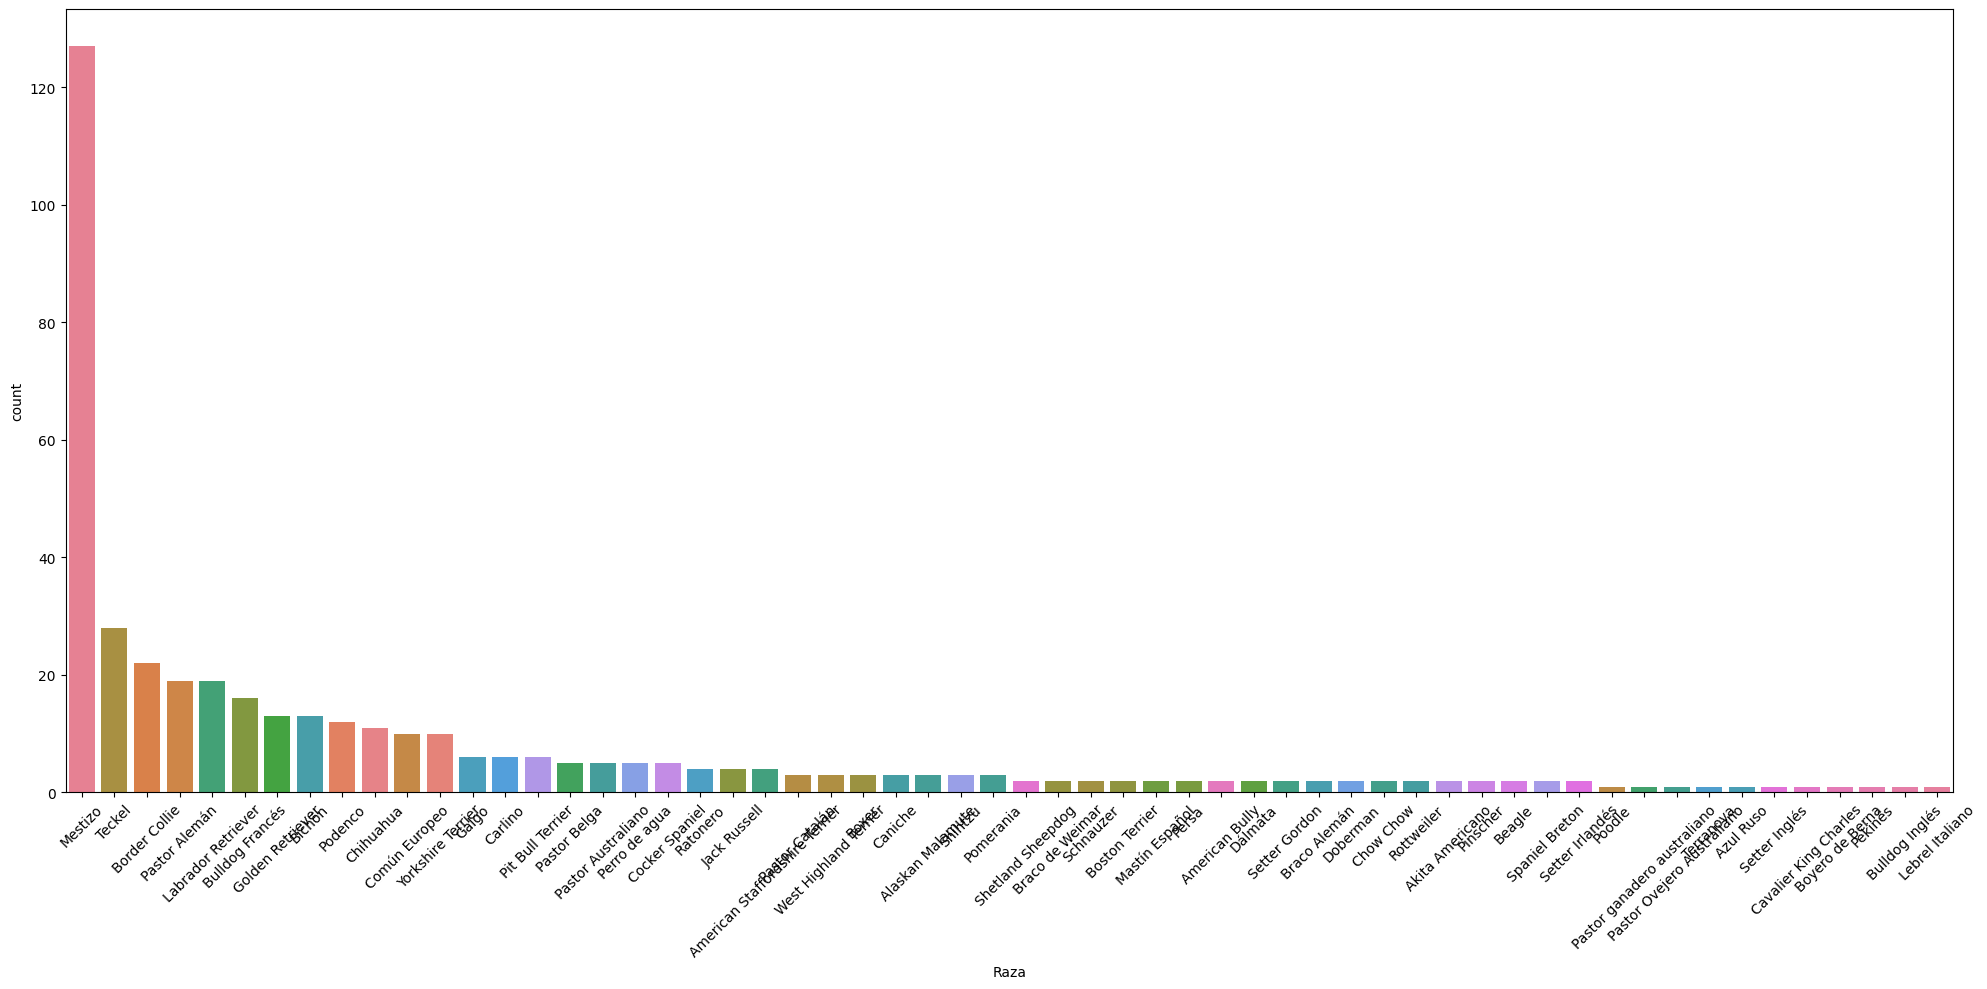

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Raza", data = df, hue = "Raza",palette="husl", legend = False, order=df["Raza"].value_counts().index)     
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
